# Packages

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import *

# Loading the data
I have used the data at this link: https://www.kaggle.com/datasets/rifkaregmi/branded-cars-dataset?resource=download

In [57]:
df = pd.read_csv("Automobile data.csv")
df.head()

,Brand Name,Fuel type,Aspiration,Door Panel,Design,Wheel Drive,Engine Location,Engine Type,Cylinder Count,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horse Power,Top-RPM,City Mileage,Highway Mileage,Price in Dollars
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Preprocessing

In [58]:
# Remove the categorical data
i = 0
while i < df.shape[1]:
    if df.iloc[:,i].dtype == "object":
        df = df.drop(df.columns[i], axis=1)
    else:
        i += 1

In [59]:
df.head()

,Engine Size,Bore,Stroke,Compression Ratio,Horse Power,Top-RPM,City Mileage,Highway Mileage,Price in Dollars
0,130,3.47,2.68,9.0,111,5000,21,27,13495
1,130,3.47,2.68,9.0,111,5000,21,27,16500
2,152,2.68,3.47,9.0,154,5000,19,26,16500
3,109,3.19,3.40,10.0,102,5500,24,30,13950
4,136,3.19,3.40,8.0,115,5500,18,22,17450


In [60]:
X, y_temp = df.iloc[:,:8], df.iloc[:,8]
y = np.array(y_temp.to_numpy()).reshape(-1,1)

In [61]:
# Data scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Generating the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, train_size=0.5)

# Principal Component Analysis

In [62]:
train_pca = PCA(n_components=2).fit_transform(X_train)
cv_pca = PCA(n_components=2).fit_transform(X_cv)
test_pca = PCA(n_components=2).fit_transform(X_test)

# Data Visualization

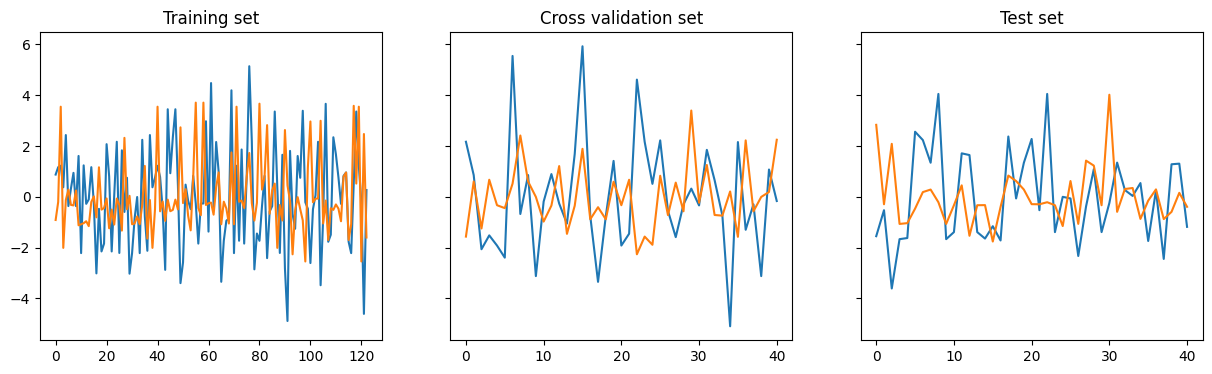

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,4))
ax1.plot(train_pca)
ax1.set_title("Training set")
ax2.plot(cv_pca)
ax2.set_title("Cross validation set")
ax3.plot(test_pca)
ax3.set_title("Test set")
plt.show()

# Model Training

In [64]:
num_features = X_train.shape[1]
models = []
mse_train = []
mse_cv = []
mae_train = []
mae_cv = []

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="linear")
]))

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(16, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="linear")
]))

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
]))

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(16, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear")
]))

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
]))

models.append(tf.keras.models.Sequential([
    layers.Input(num_features),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="linear")
]))

for model in models:
    model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.Adam(0.01))
    model.fit(X_train, y_train, epochs=100)

    yhat_train = model.predict(X_train)
    yhat_cv = model.predict(X_cv)

    mse_train.append(mean_squared_error(y_train, yhat_train))
    mse_cv.append(mean_squared_error(y_cv, yhat_cv))

    mae_train.append(mean_absolute_error(y_train, yhat_train))
    mae_cv.append(mean_absolute_error(y_cv, yhat_cv))

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.0681
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

# Error Analysis

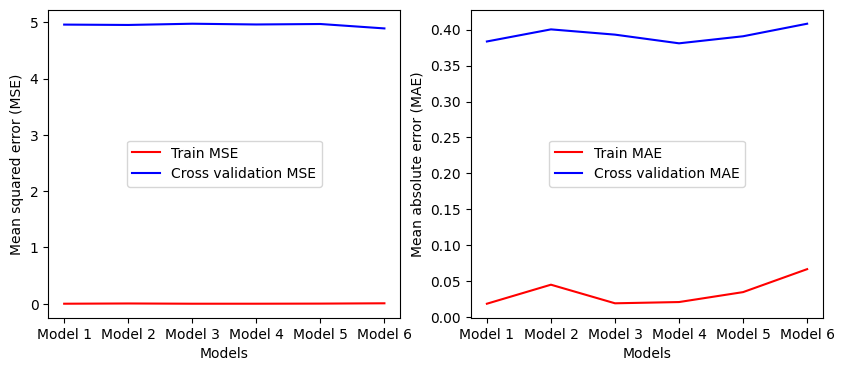

In [73]:
model_number = []
for i in range(len(models)):
    model_number.append(f"Model {i+1}")
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(model_number, mse_train, color="red", label="Train MSE")
ax1.plot(model_number, mse_cv, color="blue", label="Cross validation MSE")
ax2.plot(model_number, mae_train, color="red", label="Train MAE")
ax2.plot(model_number, mae_cv, color="blue", label="Cross validation MAE")
ax1.legend(loc="center")
ax2.legend(loc="center")
ax1.set_xlabel("Models")
ax1.set_ylabel("Mean squared error (MSE)")
ax2.set_xlabel("Models")
ax2.set_ylabel("Mean absolute error (MAE)")
plt.show()

#### As we can see from above, MSE plot is not explanatory. However, in the MAE plot, model 4 gives the lowest cross validation MAE. Hence we choose model 4 as the best model.

# Regularization

In [74]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
models = []
train_mse = []
cv_mse = []

for l in lambdas:
    # Model 4
    model = tf.keras.models.Sequential([
        layers.Input(num_features),
        layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        layers.Dense(1, activation="linear")
    ])
    models.append(model)
    
    model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.Adam(0.01))
    model.fit(X_train, y_train, epochs=100)

    yhat_train = model.predict(X_train)
    train_mse.append(mean_squared_error(y_train, yhat_train))
    yhat_cv = model.predict(X_cv)
    cv_mse.append(mean_squared_error(y_cv, yhat_cv))

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.1081
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

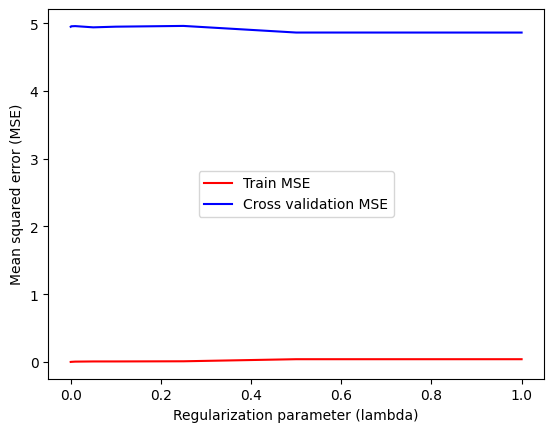

In [84]:
fig, ax = plt.subplots()
ax.plot(lambdas, train_mse, color="red", label="Train MSE")
ax.plot(lambdas, cv_mse, color="blue", label="Cross validation MSE")
ax.legend(loc="center")
plt.xlabel("Regularization parameter (lambda)")
plt.ylabel("Mean squared error (MSE)")
plt.show()

#### As we can see from above, the lowest cross validation MSE is obtained with regularization parameters 0.5 and 1. Since train MSE is greater with lambda=1, we should choose lambda=0.5.

# Testing

In [85]:
model = models[6]     # the model with lambda=0.5

yhat_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, yhat_train)
yhat_cv = model.predict(X_cv)
mse_cv = mean_squared_error(y_cv, yhat_cv)
yhat_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, yhat_test)

print(f"Train MSE: {mse_train}, Cross validation MSE: {mse_cv}, Test MSE: {mse_test}.")
print(f"Test accuracy: {100-mse_test:.2f}%.")

2/2 [==============================] - 0s 2ms/step
Train MSE: 0.04073493880628358, Cross validation MSE: 4.86206590759237, Test MSE: 0.03126697182541586.
Test accuracy: 99.97%.


# Price Prediction of an Arbitrary Car

In [87]:
x = np.array([[100, 2.90, 3.00, 9.0, 120, 5000, 20, 25]])    # an arbitrary car
scaled_y = model.predict(x)
y = scaler_y.inverse_transform(scaled_y)

print(f"Price of the car is predicted as {y[0][0]:.2f} dollars.")

1/1 [==============================] - 0s 22ms/step
Price of the car is predicted as 13827.31 dollars.
